# OpendTect Python Bindings - Horizons

In [1]:
import sys
import platform
data_root = None
alt_root = None
if platform.system() == 'Linux':
    sys.path.insert(0, "/opt/seismic/OpendTect_6/6.6.0/bin/lux64/Release")
#    sys.path.insert(0,'/home/wayne/Work/WMSeismicSolutions/dGB/Development/Build/bin/od6.6/bin/lux64/Debug')
    data_root = '/mnt/Data/seismic/ODData'
    alt_root = '/mnt/Data/seismic/CooperBasin/ODData'
elif platform.system() == 'Windows':
    sys.path.insert(0, "C:/Program Files/OpendTect/6.6.0/bin/win64/Release")
    data_root = 'Y:/seismic/ODData'
    alt_root = 'Y:/seismic/CooperBasin/ODData'

import wmodpy

## Horizons3D Class
This class provides access to 3D Horizon data in  an OpendTect project/survey. Creating a Horizons3D object requires a Survey object for context. Methods are provided to:
-  List the names of all horizons
-  Get the 3D horizon Z values as a Numpy array

In [2]:
f3demo = wmodpy.Survey(data_root, 'F3_Demo_2020')
f3demo_3d_horizons = wmodpy.Horizons3D(f3demo)
f3demo_3d_horizons.names()

['Demo 0 --> FS4',
 'Demo 1 --> MFS4',
 'Demo 2 --> FS6',
 'Demo 3  --> Top Foresets',
 'Demo 4 --> Truncation',
 'Demo 5 --> FS7',
 'Demo 6 --> FS8',
 'Demo 7 --> shallow',
 'test',
 'Trim_D0 --> FS4',
 'Trim_D4 --> Truncation',
 'Trim_D5 --> FS7',
 'Trim_D6 --> FS8']

In [3]:
arr, info = f3demo_3d_horizons.get_z('Demo 0 --> FS4')
import rasterio as rst
import rasterio.plot as rp
import rasterio.transform as rt
#import rasterio.transform as rt
trans = rt.Affine(*info['transform'])
rp.show(arr,transform=trans,cmap='inferno')
trans

ModuleNotFoundError: No module named 'rasterio'

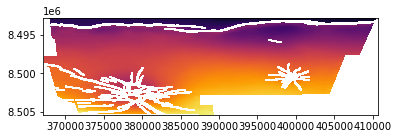

Affine(17.677668160002213, 17.677670089993626, 367101.506671275,
       17.677670519798994, -17.67767009139061, 8492755.364229945)

In [4]:
floyd = wmodpy.Survey('/mnt/Data/seismic/ODData', 'Floyd')
floyd_hor = wmodpy.Horizons3D(floyd)
arr, info = floyd_hor.get_z('fossil_head')
trans = rt.Affine(*info['transform'])
arr_masked = np.ma.masked_array(arr, mask=(arr == info['nodata']))
rp.show(arr_masked,transform=trans,cmap='inferno')
trans

## Horizons2D Class
This class provides access to 2D Horizon data in an OpendTect project/survey. Creating a Horizons2D object requires a Survey object for context. Methods are provided to:

-  List the names of all horizons


In [4]:
f3demo_2d_horizons = wmodpy.Horizons2D(f3demo)
f3demo_2d_horizons.names()

['2D Demo0 - FS4',
 '2D Demo1 - MFS4',
 '2D Demo4 - Truncation',
 '2D Demo6 - FS8',
 '2D Demo7 - FS11',
 'SSIS-Grid-Base',
 'SSIS-Grid-Top',
 'SSIS-Grid1-MFS1',
 'SSIS-Grid2-TopHST1',
 'SSIS-Grid3-SB1',
 'SSIS-Grid4-MRS1',
 'SSIS-Grid5-TopHST2',
 'SSIS-Grid6-SB2',
 'SSIS-Grid7-MRS2']